In [1]:
import numpy as np
import trame
import matplotlib.pyplot as plt

In [2]:
%cd ..

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/HeartReconstruction


/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


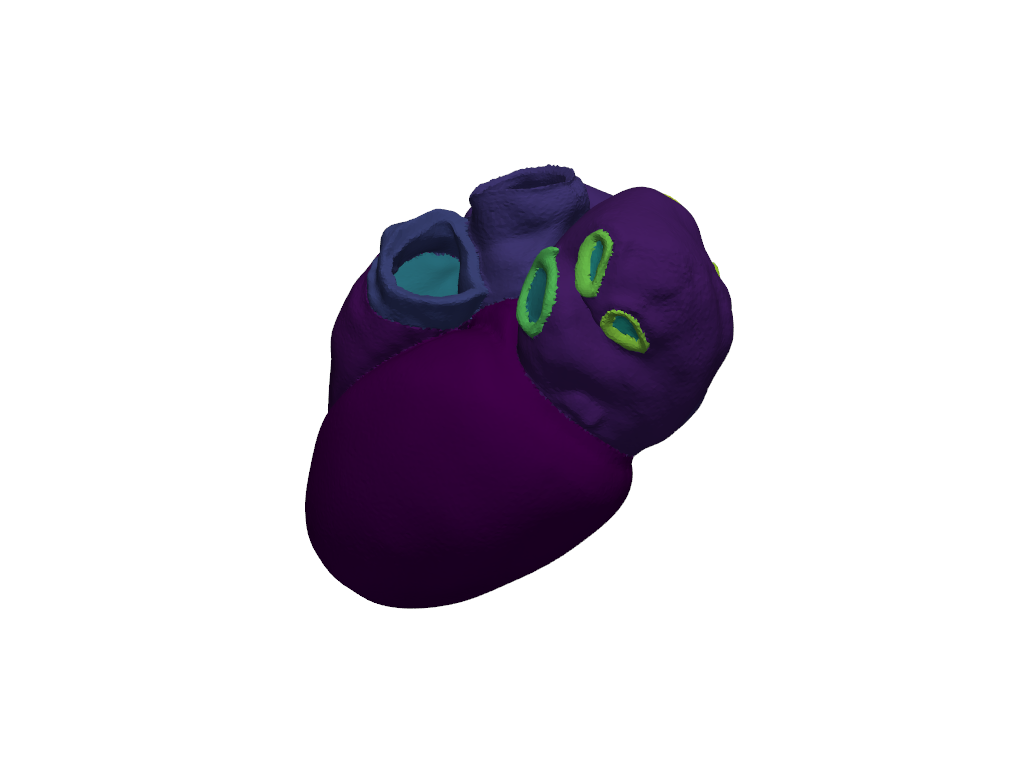

In [3]:
import pyvista as pv

# read the data
grid = pv.read('data/temporary/Final_models_01/Full_Heart_Mesh_6.vtk')

# plot the data with an automatically created Plotter
grid.plot(show_scalar_bar=False, show_axes=False)

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


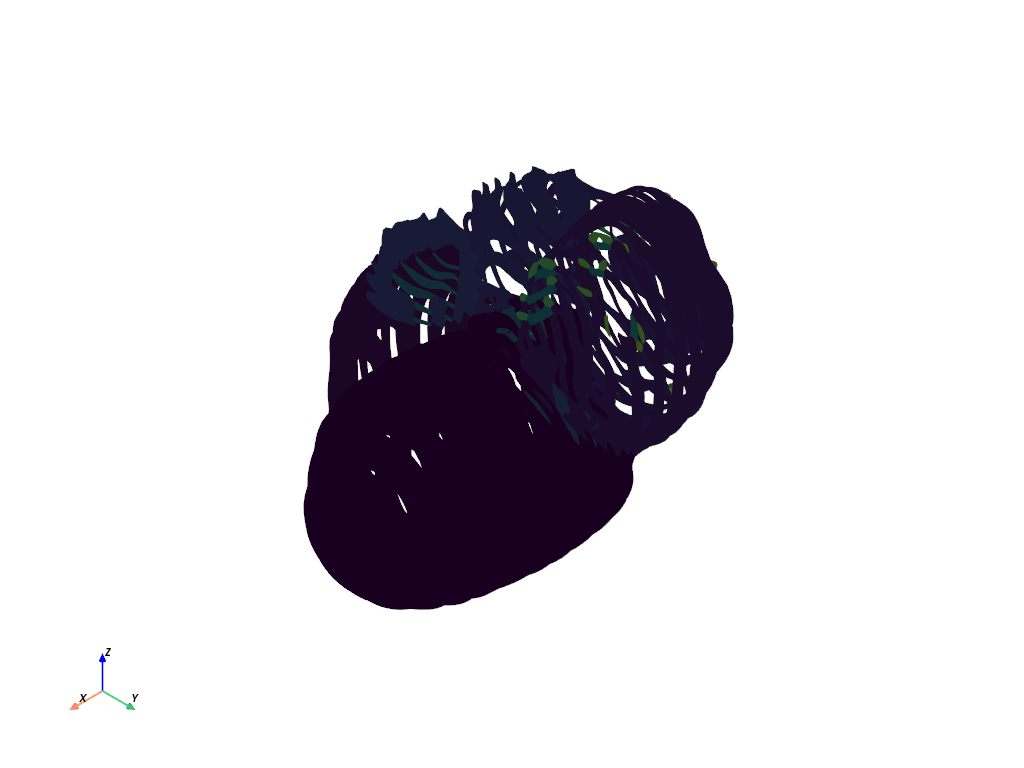

In [4]:
grid.slice_along_axis(25, axis='x').plot(show_scalar_bar=False, show_axes=True)

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


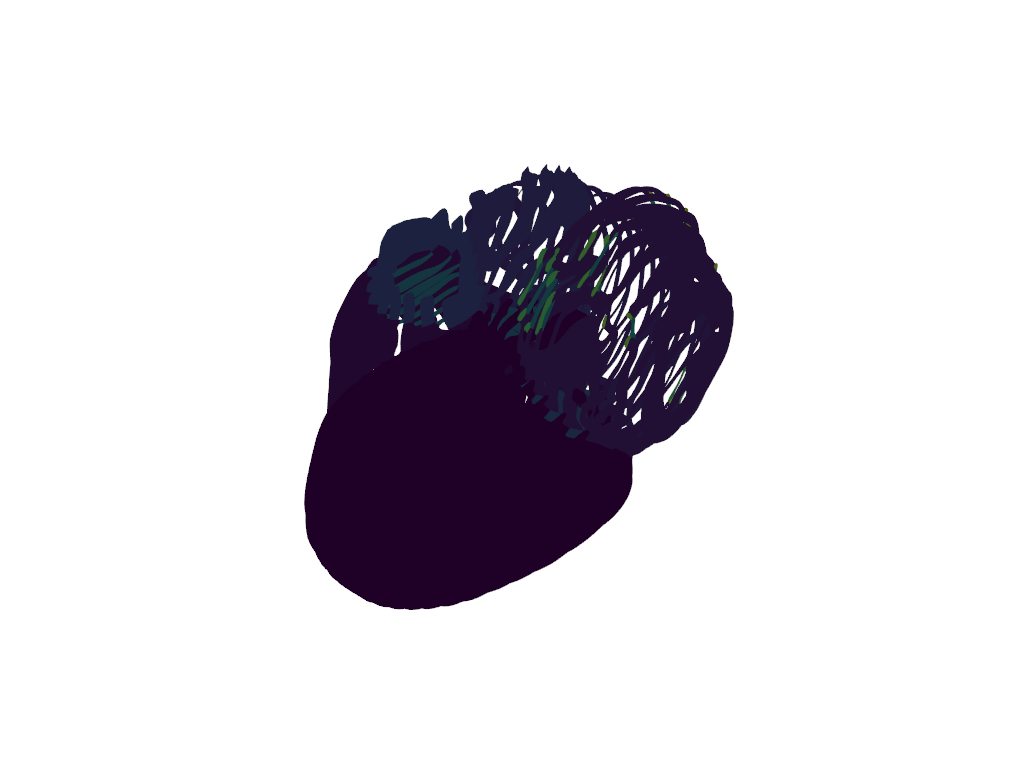

In [5]:
grid.slice_along_axis(25, axis='y').plot(show_scalar_bar=False, show_axes=False)

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


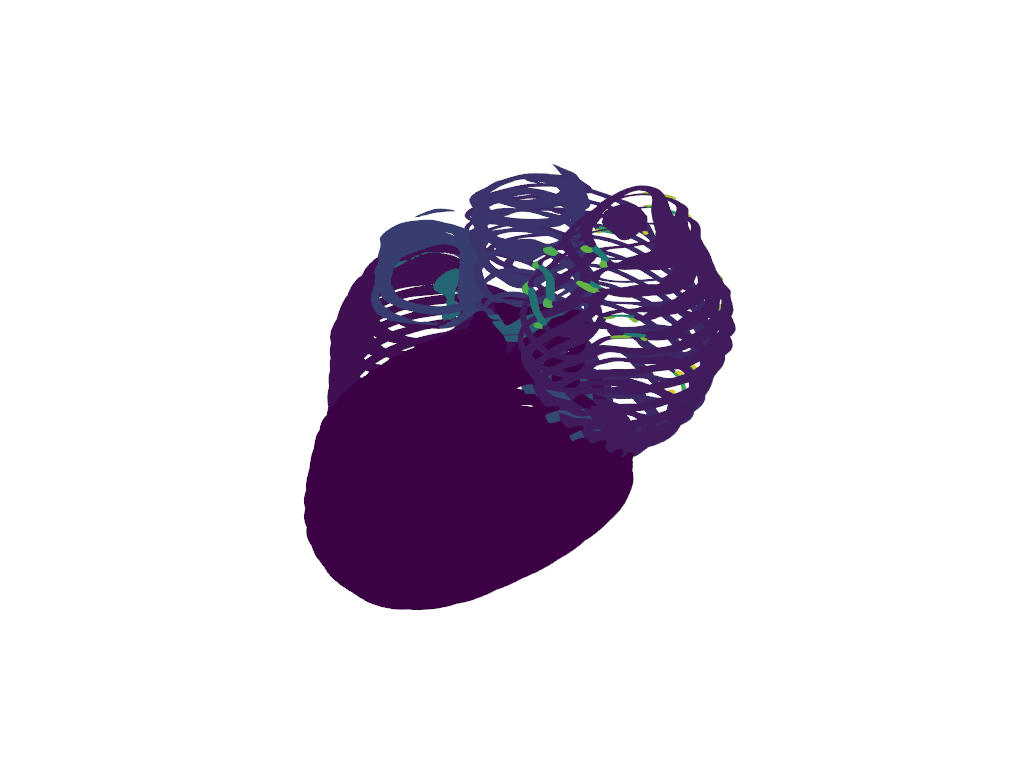

In [6]:
grid.slice_along_axis(25, axis='z').plot(show_scalar_bar=False, show_axes=False)

In [7]:
# grid.slice_along_axis(25, axis='z').points

AttributeError: 'MultiBlock' object has no attribute 'points'

In [8]:
mesh = pv.read('data/temporary/Final_models_01/Full_Heart_Mesh_6.vtk')
mesh['new array'] = np.full(mesh.n_points, 5)

In [9]:
# Create vector
vec = np.array([1.0, 1.0, 1.0])
# Normalize the vector
normal = vec / np.linalg.norm(vec)

# Make points along that vector for the extent of your slices
a = mesh.center + normal * mesh.length / 3.0
b = mesh.center - normal * mesh.length / 3.0

# Define the line/points for the slices
n_slices = 5
line = pv.Line(a, b, n_slices)

# Generate all of the slices
slices = pv.MultiBlock()
for point in line.points:
    slices.append(mesh.slice(normal=normal, origin=point))

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


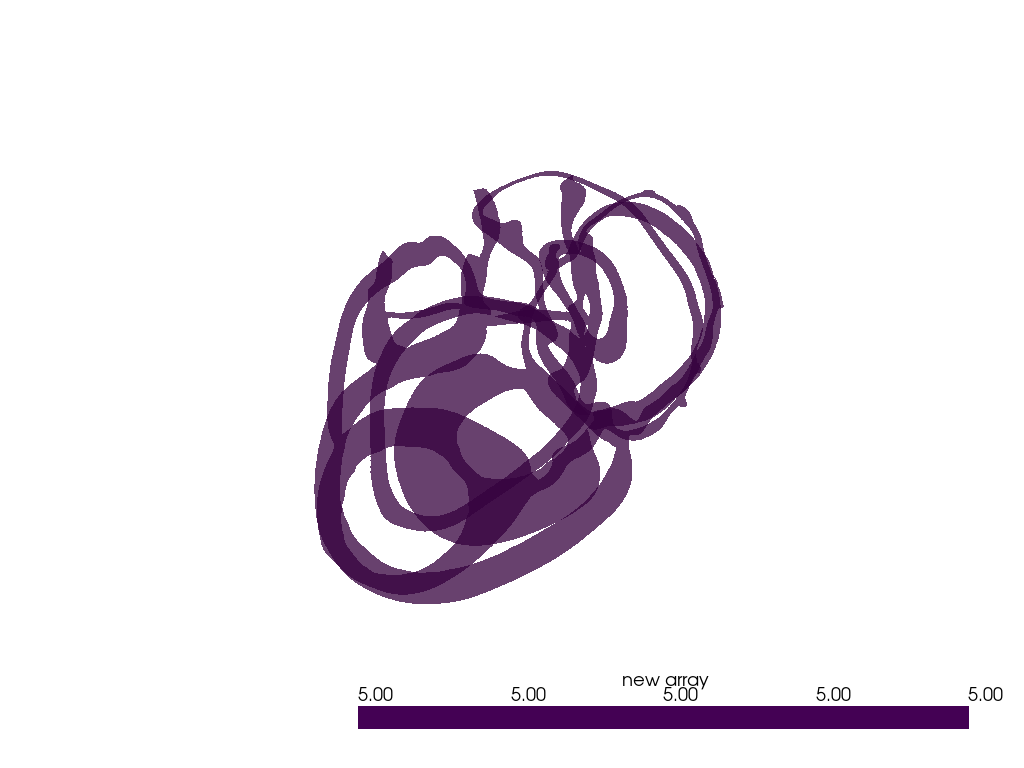

In [10]:
p = pv.Plotter()
# p.add_mesh(mesh.outline(), color="k")
p.add_mesh(slices, opacity=0.75)
# p.add_mesh(line, color="red", line_width=5)
p.show()

In [11]:
ranges = np.ptp(np.array(mesh.bounds).reshape(-1, 2), axis=1)
point = np.array(mesh.center) - ranges * 0.25

In [12]:
increment = np.pi / 6.0
# use a container to hold all the slices
slices = pv.MultiBlock()  # treat like a dictionary/list
for theta in np.arange(0, np.pi, increment):
    normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi / 2.0)
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = mesh.slice(origin=point, normal=normal)
slices

MultiBlock (0x735af6626f80)
  N Blocks    6
  X Bounds    -68.256, 50.223
  Y Bounds    -61.402, 44.264
  Z Bounds    -54.654, 65.333

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


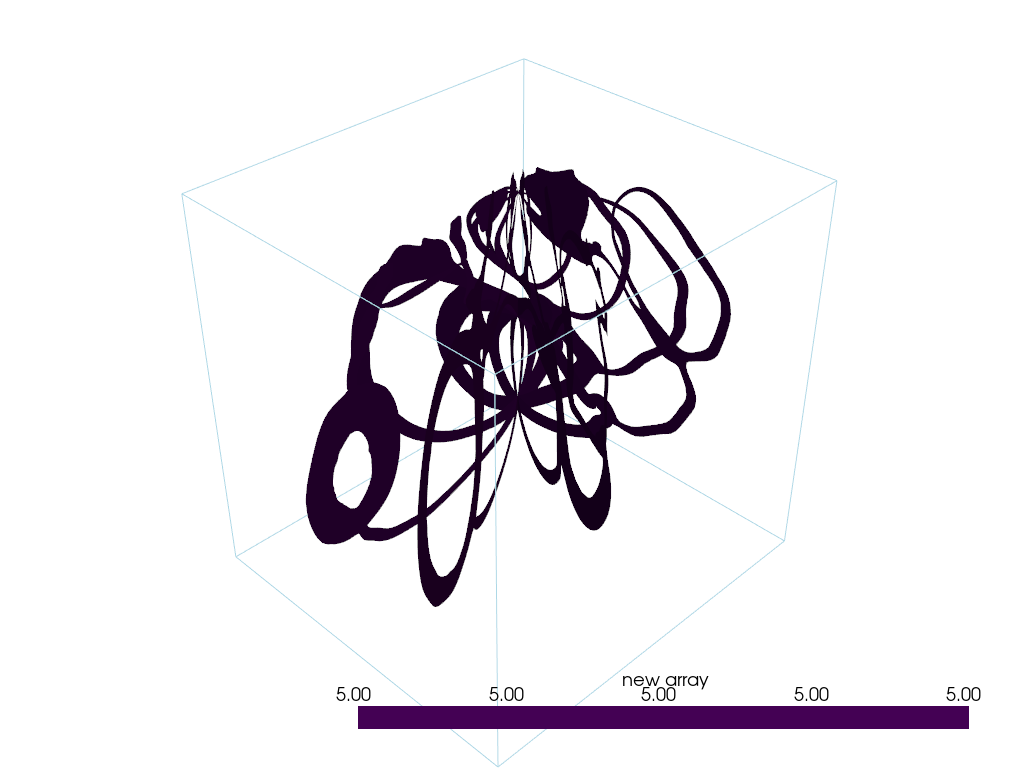

In [13]:
# define a categorical colormap
cmap = plt.get_cmap("viridis", 4)

p = pv.Plotter()
p.add_mesh(slices, cmap=cmap)
p.add_mesh(mesh.outline())
p.show()

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


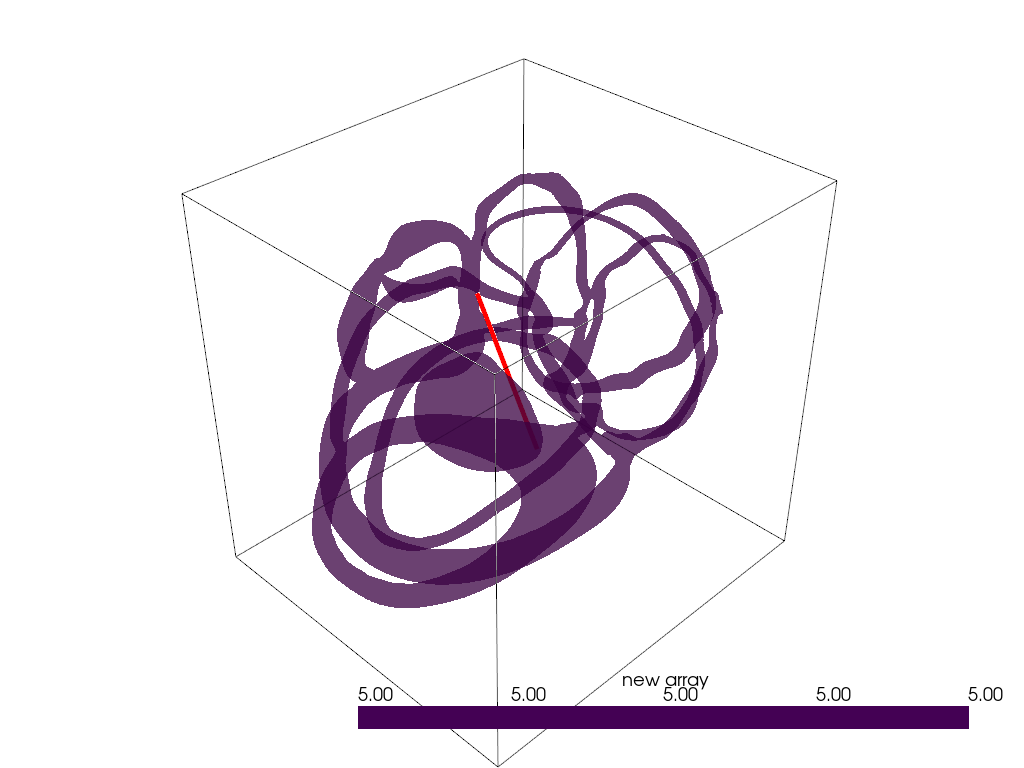

In [14]:
vec = np.random.rand(3)
# Normalize the vector
normal = vec / np.linalg.norm(vec)

# Make points along that vector for the extent of your slices
a = mesh.center + normal * mesh.length / 3.0
b = mesh.center - normal * mesh.length / 3.0

n_slices = 5
line = pv.Line(a, b, n_slices)

# Generate all of the slices
slices = pv.MultiBlock()
for point in line.points:
    slices.append(mesh.slice(normal=normal, origin=point))

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(slices, opacity=0.75)
p.add_mesh(line, color="red", line_width=5)
p.show()

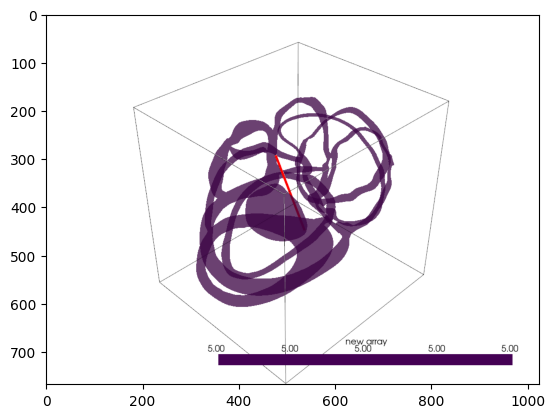

In [15]:
plt.imshow(p.image)

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


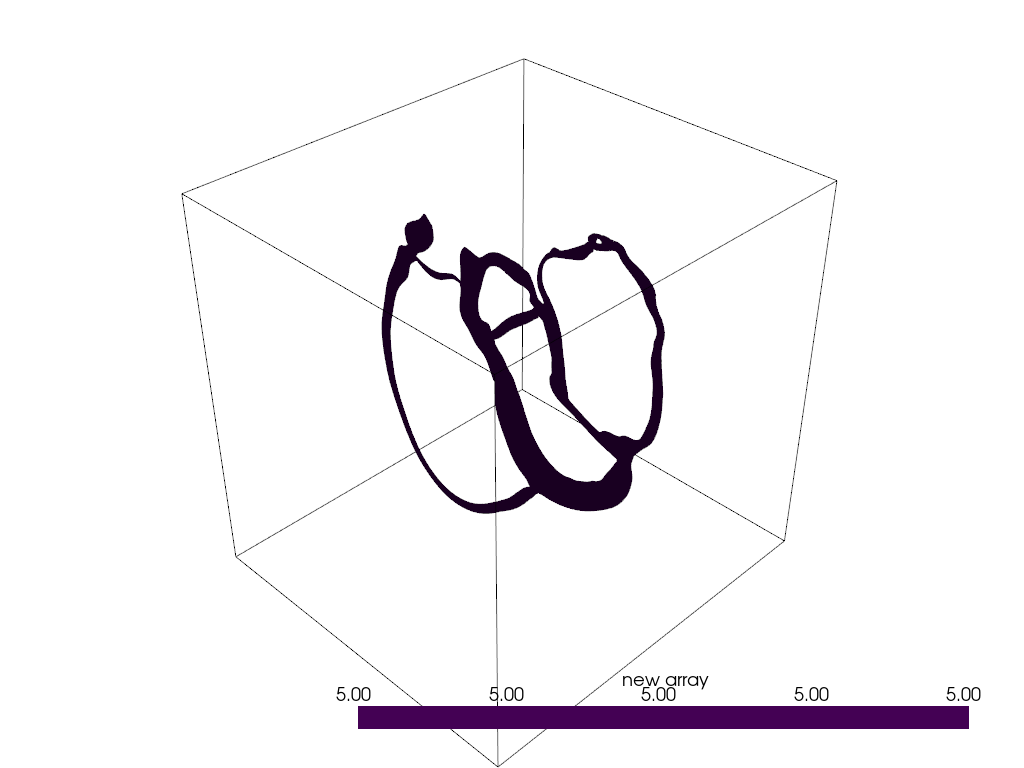

In [16]:
# Single slice - origin defaults to the center of the mesh
single_slice = mesh.slice(normal=[1, 0.0, 0])

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(single_slice, cmap=cmap)
p.show()

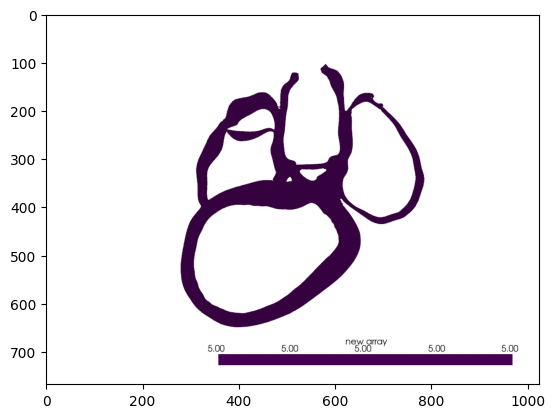

In [17]:
single_slice = mesh.slice(normal=[0.1, 0.1, 0.1])

p = pv.Plotter()
p.add_mesh(single_slice)
image = p.screenshot(None, return_img=True)
plt.imshow(image)

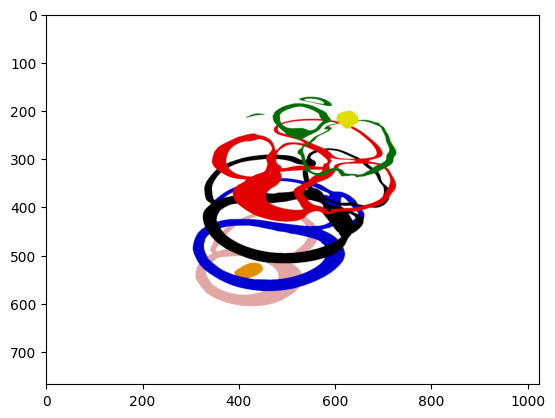

In [18]:
new_slices = grid.slice_along_axis(7, axis='z')

p = pv.Plotter()
p.add_mesh(new_slices.get(0), color='orange')
p.add_mesh(new_slices.get(1), color='orange')
p.add_mesh(new_slices.get(1), color='pink')
p.add_mesh(new_slices.get(2), color='blue')
p.add_mesh(new_slices.get(3), color='black')
p.add_mesh(new_slices.get(4), color='red')
p.add_mesh(new_slices.get(5), color='green')
p.add_mesh(new_slices.get(6), color='yellow')
image = p.screenshot(None, return_img=True)
plt.imshow(image);


In [21]:
import os
import pyvista as pv
import argparse
from pyvista import examples

# Convert .vtk to .obj
def convertFiles(indir, outdir):
    files = os.listdir(indir)
    ret = 0
    print("In:", indir)
    print("Out:", outdir)
    for f in files:
        print(f)
        # mesh = pv.read(f)
        mesh = pv.read('data/temporary/Final_models_01/Full_Heart_Mesh_6.vtk')
        print(files)
        basename = os.path.basename(f)
        print("Copying file:", basename)
        basename = os.path.splitext(basename)[0]
        print("Fle name:", basename)
        othermesh = examples.load_uniform()
        legend_entries = []
        legend_entries.append(['Liver converted', 'w'])
        legend_entries.append(['External marker', 'k'])
        plotter = pv.Plotter()
        _ = plotter.add_mesh(mesh)
        _ = plotter.add_mesh(othermesh, 'k')
        _ = plotter.add_legend(legend_entries)
        _ = plotter.export_obj(outdir+"conv_"+basename+".obj")
        ret +=1
        # plotter.show()

    print("Successfully converted %d out of %d files." % (ret, len(files)))

if not os.path.exists('data/temporary/objects'):
    os.mkdir('data/temporary/objects')
convertFiles('data/temporary/Final_models_01', 'data/temporary/objects')

In: data/temporary/Final_models_01
Out: data/temporary/objects
Full_Heart_Mesh_4.vtk
['Full_Heart_Mesh_4.vtk', 'Full_Heart_Mesh_13.vtk', 'Full_Heart_Mesh_16.vtk', 'Full_Heart_Mesh_15.vtk', 'Full_Heart_Mesh_2.vtk', 'Full_Heart_Mesh_10.vtk', 'Full_Heart_Mesh_17.vtk', 'Full_Heart_Mesh_11.vtk', 'Full_Heart_Mesh_5.vtk', 'Full_Heart_Mesh_22.vtk', 'Full_Heart_Mesh_3.vtk', 'Full_Heart_Mesh_18.vtk', 'Full_Heart_Mesh_12.vtk', 'Full_Heart_Mesh_19.vtk', 'Full_Heart_Mesh_6.vtk', 'Cases_weights_1.csv', 'Full_Heart_Mesh_25.vtk', 'Full_Heart_Mesh_24.vtk', 'Full_Heart_Mesh_23.vtk', 'Full_Heart_Mesh_8.vtk', 'Full_Heart_Mesh_7.vtk', 'Full_Heart_Mesh_21.vtk', 'Full_Heart_Mesh_1.vtk', 'Full_Heart_Mesh_9.vtk', 'Full_Heart_Mesh_20.vtk', 'Full_Heart_Mesh_14.vtk']
Copying file: Full_Heart_Mesh_4.vtk
Fle name: Full_Heart_Mesh_4
Full_Heart_Mesh_13.vtk
['Full_Heart_Mesh_4.vtk', 'Full_Heart_Mesh_13.vtk', 'Full_Heart_Mesh_16.vtk', 'Full_Heart_Mesh_15.vtk', 'Full_Heart_Mesh_2.vtk', 'Full_Heart_Mesh_10.vtk', 'Full_He